On commence par modifier le code pour tracer Nx(error) pour err=0.04, 0.02, 0.01, 0.005, 0.0025

Erreur cible: 0.01, NX requis: 100
Erreur cible: 0.02, NX requis: 50
Erreur cible: 0.04, NX requis: 25


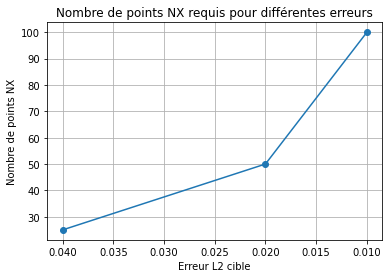

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# PHYSICAL PARAMETERS
K = 0.1     # Diffusion coefficient
L = 1.0     # Domain size
Time = 20.0 # Integration time

V = 1
lamda = 1

# CONVERGENCE CRITERIA
target_errors = [0.04, 0.02, 0.01, 0.005, 0.0025]
found_NX = {}

# BOUCLE DE RAFFINEMENT DU MAILLAGE
NX_start = 10
NX_max = 200

for NX in range(NX_start, NX_max + 1, 5):

    dx = L / (NX - 1)
    dt = dx**2 / (V * dx + 4 * K + dx**2)  # Stability condition

    # Initialisation des vecteurs
    x = np.linspace(0.0, 1.0, NX)
    T = np.zeros(NX)
    F = np.zeros(NX)
    RHS = np.zeros(NX)
    Tex = np.zeros(NX)

    # Donnée exacte et source F
    for j in range(1, NX - 1):
        Tex[j] = np.exp(-20 * (j * dx - 0.5) ** 2)

    for j in range(1, NX - 1):
        Tx = (Tex[j + 1] - Tex[j - 1]) / (2 * dx)
        Txx = (Tex[j + 1] - 2 * Tex[j] + Tex[j - 1]) / (dx ** 2)
        F[j] = V * Tx - K * Txx + lamda * Tex[j]

    # Boucle en temps
    NT = 10000
    eps = 0.001
    res = 1
    res0 = 1
    n = 0
    while n < NT and res / res0 > eps:
        res = 0
        for j in range(1, NX - 1):
            xnu = K + 0.5 * dx * abs(V)
            Tx = (T[j + 1] - T[j - 1]) / (2 * dx)
            Txx = (T[j - 1] - 2 * T[j] + T[j + 1]) / (dx ** 2)
            RHS[j] = dt * (-V * Tx + xnu * Txx - lamda * T[j] + F[j])
            res += abs(RHS[j])
        for j in range(1, NX - 1):
            T[j] += RHS[j]

        if n == 0:
            res0 = res
        n += 1

    # Calcul de l'erreur L2
    errL2h = 0
    for j in range(1, NX - 1):
        errL2h += dx * (T[j] - Tex[j]) ** 2
    errL2 = np.sqrt(errL2h)

    # Vérifie si une des erreurs cibles est atteinte
    for err_target in target_errors:
        if err_target not in found_NX and errL2 < err_target:
            found_NX[err_target] = NX

    # Stop si toutes les erreurs cibles ont été atteintes
    if len(found_NX) == len(target_errors):
        break

# Trie les résultats selon les erreurs
sorted_errors = sorted(found_NX.keys())
corresponding_NX = [found_NX[err] for err in sorted_errors]

# Affichage des résultats
for err, nx in zip(sorted_errors, corresponding_NX):
    print(f"Erreur cible: {err}, NX requis: {nx}")

# Tracé de NX en fonction de l'erreur
plt.figure()
plt.plot(sorted_errors, corresponding_NX, marker='o')
plt.gca().invert_xaxis()
plt.xlabel("Erreur L2 cible")
plt.ylabel("Nombre de points NX")
plt.title("Nombre de points NX requis pour différentes erreurs")
plt.grid(True)
plt.show()

1) on calcule une solution approchée sur un maillage très fin (maillage background)
2) on met en place un raffinement de maillage pour avoir un maillage uniforme dans une certaine métrique (métrique liée la dérivée seconde de façon à avoir plus de noeuds aux lieux de fortes variations de la solution)
3) à chaque raffinnement on interpole la solution obtenue par maillage adaptatif (pour pouvoir la comparer la solution sur maillage fin)
4) on compare les deux solutions si le seuil n'est pas atteint on raffine encore le maillage

Ce code résout une équation d’advection-diffusion-réaction unidimensionnelle avec une source, en imposant des conditions de Dirichlet homogènes (T = 0 aux bords). Il calcule d’abord une solution de référence sur un maillage très fin, puis effectue une résolution adaptative en raffinement successif du maillage, basé sur une métrique liée à la dérivée seconde de la solution. À chaque raffinement, la solution est comparée à celle de l’itération précédente via un critère de Cauchy (norme L² de la différence), permettant de stopper l’adaptation une fois la convergence atteinte. Le programme affiche une seule figure comparant la solution exacte, la solution approchée sur le maillage très fin, et celle obtenue par le maillage adaptatif.

▶ Résolution sur maillage très fin...

▶ Résolution adaptative avec critère de Cauchy...
  Iter  1: Nb pts = 8, min(dx) = 0.14188, max(dx) = 0.14302
     ➜ Erreur Cauchy = 3.747368e-01
  Iter  2: Nb pts = 38, min(dx) = 0.02043, max(dx) = 0.04232
     ➜ Erreur Cauchy = 3.218053e-01
  Iter  3: Nb pts = 74, min(dx) = 0.01000, max(dx) = 0.10396
     ➜ Erreur Cauchy = 6.923740e-02
  Iter  4: Nb pts = 76, min(dx) = 0.01000, max(dx) = 0.06736
     ➜ Erreur Cauchy = 8.407522e-03
  Iter  5: Nb pts = 78, min(dx) = 0.01000, max(dx) = 0.06698
     ➜ Erreur Cauchy = 3.509904e-03
  Iter  6: Nb pts = 80, min(dx) = 0.01000, max(dx) = 0.08707
     ➜ Erreur Cauchy = 2.618458e-03
  Iter  7: Nb pts = 81, min(dx) = 0.01000, max(dx) = 0.06760
     ➜ Erreur Cauchy = 2.049338e-03
  Iter  8: Nb pts = 82, min(dx) = 0.01000, max(dx) = 0.06858
     ➜ Erreur Cauchy = 1.805277e-03
  Iter  9: Nb pts = 83, min(dx) = 0.01000, max(dx) = 0.08360
     ➜ Erreur Cauchy = 1.620418e-03
  Iter 10: Nb pts = 84, min(dx) = 0.010

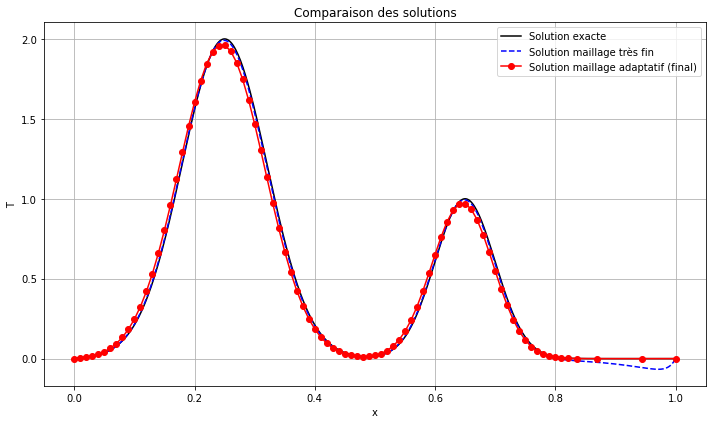

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# --- Paramètres physiques ---
K = 0.01
xmin = 0.0
xmax = 1.0
Time = 10.0
V = 1.0
lamda = 1.0

# --- Paramètres adaptation ---
niter_refinement = 30
hmin = 0.01
hmax = 0.15
err_init = 0.03  # Tolérance initiale pour la métrique

# --- Paramètres numériques ---
NT = 10000
eps = 1e-3         # Tolérance pour convergence temporelle
eps_cauchy = 1e-4  # Tolérance pour convergence Cauchy
dt = 1e-4          # Pas de temps fixe

# --- Solution exacte ---
def exact_solution(x):
    return 2*np.exp(-100*(x-0.25)**2) + np.exp(-200*(x-0.65)**2)

# --- Calcul métrique basée sur dérivée seconde ---
def compute_metric(x, u, err):
    NX = len(x)
    metric = np.zeros(NX)
    for j in range(1, NX-1):
        Txip1 = (u[j+1] - u[j]) / (x[j+1] - x[j])
        Txim1 = (u[j] - u[j-1]) / (x[j] - x[j-1])
        Txx = (Txip1 - Txim1) / (0.5*(x[j+1]+x[j]) - 0.5*(x[j]+x[j-1]))
        metric[j] = min(1./hmin**2, max(1./hmax**2, abs(Txx)/err))
    metric[0] = metric[1]
    metric[-1] = metric[-2]
    for j in range(len(metric)-1):
        metric[j] = 0.5*(metric[j] + metric[j+1])
    metric[-1] = metric[-2]
    return metric

# --- Raffinement du maillage ---
def refine_mesh(x, hloc):
    xnew = [x[0]]
    while xnew[-1] < xmax - hmin:
        idx = np.searchsorted(x, xnew[-1]) - 1
        idx = max(0, min(idx, len(x)-2))
        h_local = (hloc[idx]*(x[idx+1]-xnew[-1]) + hloc[idx+1]*(xnew[-1]-x[idx])) / (x[idx+1]-x[idx])
        h_local = min(max(hmin, h_local), hmax)
        nxt = min(xmax, xnew[-1] + h_local)
        if nxt <= xnew[-1]:
            break
        xnew.append(nxt)
    return np.array(xnew)

# --- Résolution sur un maillage donné ---
def solve_on_mesh(x, T_init, dt):
    NX = len(x)
    T = T_init.copy()
    F = np.zeros(NX)
    Tex = exact_solution(x)
    for j in range(1, NX-1):
        Tx = (Tex[j+1] - Tex[j-1]) / (x[j+1] - x[j-1])
        Txip1 = (Tex[j+1] - Tex[j]) / (x[j+1] - x[j])
        Txim1 = (Tex[j] - Tex[j-1]) / (x[j] - x[j-1])
        Txx = (Txip1 - Txim1) / (0.5*(x[j+1]+x[j]) - 0.5*(x[j]+x[j-1]))
        F[j] = V*Tx - K*Txx + lamda*Tex[j]

    n = 0
    res = 1
    res0 = 1
    t = 0
    while n < NT and (res/res0 > eps) and (t < Time):
        n += 1
        t += dt
        res = 0
        RHS = np.zeros(NX)
        for j in range(1, NX-1):
            visnum = 0.5*(0.5*(x[j+1]+x[j]) - 0.5*(x[j]+x[j-1])) * abs(V)
            xnu = K + visnum
            Tx = (T[j+1] - T[j-1]) / (x[j+1] - x[j-1])
            Txip1 = (T[j+1] - T[j]) / (x[j+1] - x[j])
            Txim1 = (T[j] - T[j-1]) / (x[j] - x[j-1])
            Txx = (Txip1 - Txim1) / (0.5*(x[j+1]+x[j]) - 0.5*(x[j]+x[j-1]))
            RHS[j] = dt * (-V*Tx + xnu*Txx - lamda*T[j] + F[j])
            res += abs(RHS[j])
        for j in range(1, NX-1):
            T[j] += RHS[j]

        # --- Conditions de Dirichlet homogène ---
        T[0] = 0.0
        T[-1] = 0.0

        if n == 1:
            res0 = res
    return T

# --- Résolution sur maillage très fin (de référence) ---
NX_fine = 500
x_fine = np.linspace(xmin, xmax, NX_fine)
T_init_fine = np.zeros(NX_fine)
print("▶ Résolution sur maillage très fin...")
T_fine = solve_on_mesh(x_fine, T_init_fine, dt)

# --- Résolution adaptative avec critère de Cauchy ---
NX = 30
x = np.linspace(xmin, xmax, NX)
T = np.zeros(NX)

error_cauchy = []
converged = False
itera = 0

print("\n▶ Résolution adaptative avec critère de Cauchy...")
while itera < niter_refinement and not converged:
    itera += 1
    adaptive_err = err_init / (itera ** 0.5)
    metric = compute_metric(x, T, adaptive_err)
    metric *= 1.0 + 0.1 * itera
    hloc = np.sqrt(1. / metric)

    x_new = refine_mesh(x, hloc)
    dxs = np.diff(x_new)
    print(f"  Iter {itera:2d}: Nb pts = {len(x_new)}, min(dx) = {dxs.min():.5f}, max(dx) = {dxs.max():.5f}")

    interp_old = interp1d(x, T, kind='linear', fill_value="extrapolate")
    T_init = interp_old(x_new)

    T_new = solve_on_mesh(x_new, T_init, dt)

    # Critère de Cauchy
    interp_new_on_old = interp1d(x_new, T_new, kind='linear', fill_value="extrapolate")
    T_new_on_old = interp_new_on_old(x)
    error_c = np.sqrt(np.sum((T - T_new_on_old)**2) / len(T))
    error_cauchy.append(error_c)
    print(f"     ➜ Erreur Cauchy = {error_c:.6e}")

    if error_c < eps_cauchy:
        converged = True
        print("     ✅ Convergence atteinte (critère de Cauchy)")

    x = x_new
    T = T_new

# --- Tracé final ---
x_plot = np.linspace(xmin, xmax, 500)

plt.figure(figsize=(10,6))
plt.plot(x_plot, exact_solution(x_plot), 'k-', label='Solution exacte')
plt.plot(x_fine, T_fine, 'b--', label='Solution maillage très fin')
plt.plot(x, T, 'ro-', label='Solution maillage adaptatif (final)')
plt.xlabel('x')
plt.ylabel('T')
plt.title('Comparaison des solutions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
